In [ ]:
#Necessary libraries for our project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **DATA EXPLORATION**

In [ ]:
#Importing the dataset
df = pd.read_csv( "go_emotions_dataset.csv")
df.head(5)

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,eeibobj,Man I love reddit.,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.shape

(37078, 31)

This dataset is composed of 211225 observations, which are comments from Reddit users.
There are 31 features in this dataset, seprating in the following columns :

*   ID of the user
*   The text of the comments
*   Is the text very unclear or not
*   12 positive emotions
*   11 negative emotions
*   4 ambiguous emotions
*   1 neutral emotion




In [ ]:
#The first 3 column are informations of the comments, so we create a subset to be able to properly conduct a analysis on the emotions.
emotions = set(df.columns[3:])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [ ]:
#Now, we split the different emotions into positive, negative, and ambiguous emotions
positive = {'admiration','amusement','approval','caring','desire','excitement','gratitude','joy','love','optimism','pride','relief'}
negative = {'sadness','fear','embarrassment','disapproval','disappointment','annoyance','anger','nervousness','remorse','grief','disgust'}
ambiguous = {'realization','surprise','curiosity','confusion','neutral'}
# That we help us conduct the analysis later on and to conclude more easily on the general nature of the emotion of the comment, since treating 28 emotions separately would be too complex.

In [ ]:
print(f'Number of positive emotions: {len(positive)}')
print(f'Number of negative emotions: {len(negative)}')
print(f'Number of ambiguous emotions: {len(ambiguous)}')

Number of positive emotions: 12
Number of negative emotions: 11
Number of ambiguous emotions: 5


In [ ]:
# Creating an empty DataFrame
df_emotion = pd.DataFrame()

# Adding the 'emotion' column to the DataFrame and populating it with the 'emotions' list
df_emotion['emotion'] = list(emotions)

# Adding a 'group' column to the DataFrame and initializing it with empty strings, we will complete it by adding the labels of the emotions
df_emotion['group'] = ''

# Assigning the group labels based on the emotions present in the predefined lists
df_emotion['group'].loc[df_emotion['emotion'].isin(positive)] = 'positive'
df_emotion['group'].loc[df_emotion['emotion'].isin(negative)] = 'negative'
df_emotion['group'].loc[df_emotion['emotion'].isin(ambiguous)] = 'ambiguous'

df_emotion.head(5)


,emotion,group
0,caring,positive
1,grief,negative
2,curiosity,ambiguous
3,embarrassment,negative
4,excitement,positive


<ipython-input-8-be0906b6486c>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  temp = df[emotions].sum(axis=0)


<Axes: xlabel='n', ylabel='emotion'>

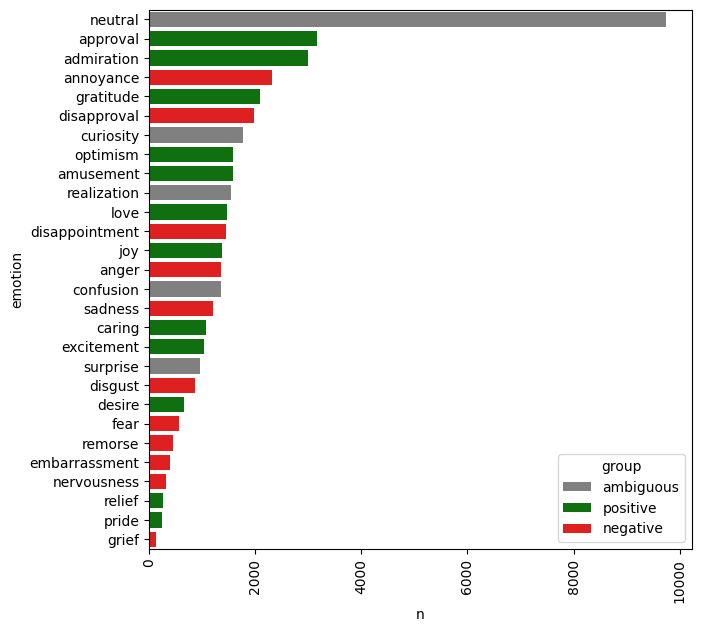

In [ ]:
# Calculate the sum of each emotion across all rows
temp = df[emotions].sum(axis=0)

# Create a new DataFrame with the emotions and their counts
temp = temp.reset_index().rename(columns={'index': 'emotion', 0: 'n'})

# Merge the emotion count DataFrame with the emotion grouping DataFrame
temp = temp.merge(df_emotion, how='left', on='emotion')

# Sort the DataFrame based on the count of each emotion in descending order
temp = temp.sort_values('n', ascending=False)

# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(axis='x', rotation=90)

# Define the color palette for different emotion groups
palette = {"positive": "green", "negative": "red", "ambiguous": 'gray'}

# Plot the bar chart with emotions on the y-axis, counts on the x-axis, and hue based on emotion group
sns.barplot(data=temp, x='n', y='emotion', hue='group', dodge=False, palette=palette, ax=ax)


<ipython-input-9-72c050330e84>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg('sum').reset_index()


<Axes: xlabel='group', ylabel='n'>

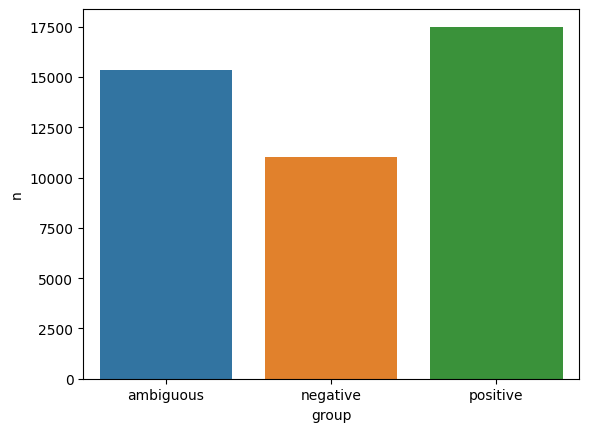

In [ ]:
temp = temp.groupby('group') \
        .agg('sum').reset_index()

sns.barplot(data=temp, x='group', y='n')

## **CLEANING DATASET**

This dataset is already really clean, but there are some improvements we can do to facilitate the training of our model.
First of all, we will clean the text column, to eliminate any information in the text that could be noise and distort the training of our model.

In [ ]:
!pip install -q preprocessor
!pip install -q contractions

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
# Text processing libraries
import preprocessor
import contractions
import re

In [ ]:
#We are re-uploading the data here to be able to rapidly restart the process from scratch.
df = pd.read_csv( "go_emotions_dataset.csv")

#For our model, we do not need the users' ID nor the third column, which is expliciting if the text is clear or not
#So, we are removing them from the data set
df.drop('id', inplace=True, axis=1)
df.drop('example_very_unclear', inplace=True, axis=1)

df.head(5)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,>sexuality shouldn’t be a grouping category I...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"You do right, if you don't care then fuck 'em!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Man I love reddit.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[NAME] was nowhere near them, he was by the Fa...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Function for cleaning text
def clean_text(text):
    # Regular expressions for different cleaning patterns
    re_number = re.compile('[0-9]+')  # Matches one or more digits
    re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")  # Matches URLs
    re_tag = re.compile('\[[A-Z]+\]')  # Matches tags in square brackets, e.g., [TAG]
    re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')  # Matches any character that is not alphanumeric, whitespace, or specific punctuation
    re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')  # Matches any character that is not alphanumeric, whitespace, or square brackets
    re_punc = re.compile('[?!,.\'\"]')  # Matches common punctuation marks

    # Cleaning steps
    text = re.sub(re_char, "", text)  # Remove unknown characters
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(re_url, ' [url] ', text)  # Replace URLs with [url]
    text = re.sub(re_char_clean, "", text)  # Keep only alphanumeric characters, whitespace, and square brackets
    #text = re.sub(re_punc, "", text)  # Remove punctuation (optional, depending on your needs)
    text = text.lower()  # Convert text to lowercase
    text = " ".join([w for w in text.split(' ') if w != " "])  # Remove extra whitespaces

    return text


In [ ]:
# We are creating a cleaned text column by applying the previously defined function on our text column.
df["cleaned_text"] = df["text"].apply(clean_text)
# Some examples to picture the impact of our text cleaning process
display(df[['text', 'cleaned_text']].sample(5))

,text,cleaned_text
29475,Would be a great pick up tbh,would be a great pick up to be honest
16726,That treatise is working well for the environm...,that treatise is working well for the environm...
2338,Sorry. This thing knows whats up!,sorry. this thing knows what is up!
1854,I BELIEVE! I am sad that likely no one else wi...,i believe! i am sad that likely no one else wi...
19983,Yep. She stopped wanting it after she got preg...,yep. she stopped wanting it after she got preg...


In [ ]:
# We create a new column ('emotion') in the DataFrame that indicates the emotion associated with each row.
df['emotion'] = (df.iloc[:, 1:] == 1).idxmax(1)

# Reorganizing DataFrame to have cleaned text and emotion column first
df = df[ ['cleaned_text', 'emotion'] + [ col for col in df.columns if col not in ['text', 'cleaned_text', 'emotion'] ] ]
df = df[df['cleaned_text'] != '']

df.head(5)

,cleaned_text,emotion,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,that game hurt.,sadness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,sexuality should not be a grouping category i...,admiration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"you do right, if you do not care then fuck them!",neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,man i love reddit.,love,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"name was nowhere near them, he was by the falc...",neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The following code is just verifying that there is no missing information in the dataset that could distort our model's training.

We thought about two possible problems :
- A missing value in the second column, the one with the name of the emotion associated to the text
- A missing information in the emotionsafter (either NAN or not a 1 to indicate the right emotion).

In [ ]:
valid_emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
                   'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
                   'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
                   'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']

# Check for "emotion" column
emotion_check = (
    df['emotion'].notnull() &
    ~df['emotion'].isin(valid_emotions)
)

# Check if each row has at least one value equal to 1 between the third and the 30th column
row_check = ~df.iloc[:, 2:30].eq(1).any(axis=1)

# Separate results based on the type of problem
emotion_problems = df[emotion_check].index.tolist()
row_problems = df[row_check].index.tolist()

# Print results
if emotion_problems and row_problems:
    print("Problems in 'emotion' column for rows with indices:", emotion_problems)
    print("Problems in rows with indices where no value is equal to 1 between the third and the 30th column:", row_problems)
elif emotion_problems:
    print("Problems in 'emotion' column for rows with indices:", emotion_problems)
elif row_problems:
    print("Problems in rows with indices where no value is equal to 1 between the third and the 30th column:", row_problems)
else:
    print("No problem")

Problems in rows with indices where no value is equal to 1 between the third and the 30th column: [1, 62, 195, 262, 264, 502, 520, 581, 584, 591, 631, 789, 904, 930, 1036, 1076, 1099, 1139, 1221, 1273, 1302, 1371, 1514, 1737, 1891, 2065, 2106, 2182, 2212, 2531, 2584, 2590, 2608, 2612, 2874, 3069, 3235, 3312, 3462, 3465, 3488, 3670, 3804, 3807, 3813, 3860, 3872, 4016, 4043, 4264, 4356, 4385, 4421, 4624, 4655, 4797, 4829, 4856, 4911, 4934, 5077, 5108, 5130, 5146, 5147, 5290, 5296, 5326, 5587, 5635, 5753, 5825, 5847, 5959, 5984, 6048, 6173, 6207, 6265, 6341, 6386, 6426, 6491, 6602, 6653, 6673, 6870, 6888, 6895, 6909, 6991, 7061, 7120, 7129, 7154, 7225, 7275, 7315, 7317, 7348, 7408, 7426, 7526, 7648, 7712, 7772, 7840, 7879, 8021, 8039, 8055, 8118, 8158, 8218, 8319, 8360, 8370, 8465, 8543, 8682, 8754, 8790, 8804, 8837, 8867, 8875, 9015, 9016, 9109, 9146, 9200, 9278, 9284, 9295, 9349, 9478, 9631, 9704, 9737, 9825, 9833, 9898, 9948, 10081, 10109, 10250, 10271, 10362, 10363, 10400, 10527, 1060

In [ ]:
# Iterate through rows and update the value in the specified column to 1
for index, row in df.iterrows():
    column_name = row.iloc[1]
    df.at[index, column_name] = 1

In [ ]:
import pandas as pd

# Check for "emotion" column
valid_emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
                   'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
                   'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
                   'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']

emotion_check = (
    df['emotion'].notnull() &
    ~df['emotion'].isin(valid_emotions)
)

# Check if each row has at least one value equal to 1 between the third and the 30th column
row_check = ~df.iloc[:, 2:30].eq(1).any(axis=1)

# Separate results based on the type of problem
emotion_problems = df[emotion_check].index.tolist()
row_problems = df[row_check].index.tolist()

# Print results
if emotion_problems and row_problems:
    print("Problems in 'emotion' column for rows with indices:", emotion_problems)
    print("Problems in rows with indices where no value is equal to 1 between the third and the 30th column:", row_problems)
elif emotion_problems:
    print("Problems in 'emotion' column for rows with indices:", emotion_problems)
elif row_problems:
    print("Problems in rows with indices where no value is equal to 1 between the third and the 30th column:", row_problems)
else:
    print("No problem")


No problem


In the following code, I wanted to check if each row had really only one value equal to 1 and the other are equal to 0.

In [ ]:
# Check if each row has only one value equal to 1 between columns 3 and 30
valid_rows = (
    (df.iloc[:, 3:31] == 1).sum(axis=1) == 1  # Check if only one value is equal to 1
    & ((df.iloc[:, 3:31] == 0) | (df.iloc[:, 3:31] == 1)).all(axis=1)  # Check if all other values are equal to 0 or 1
)

# Get the indices of rows that do not meet the conditions
problematic_rows = df[~valid_rows].index.tolist()

# Print the result
if problematic_rows:
    print("Problem in rows with indices:", problematic_rows)
else:
    print("All rows meet the conditions.")


Problem in rows with indices: [1, 13, 18, 23, 28, 29, 32, 35, 41, 48, 49, 50, 54, 62, 63, 68, 72, 75, 85, 88, 98, 109, 118, 122, 175, 176, 182, 188, 190, 195, 198, 200, 202, 213, 216, 219, 224, 226, 229, 233, 234, 235, 237, 240, 242, 243, 255, 262, 263, 264, 271, 272, 273, 277, 278, 280, 293, 295, 297, 299, 314, 323, 331, 332, 333, 344, 346, 348, 351, 354, 358, 363, 368, 371, 373, 375, 380, 381, 390, 393, 394, 399, 401, 406, 409, 411, 416, 418, 421, 422, 437, 440, 445, 449, 457, 468, 470, 473, 478, 489, 490, 491, 500, 502, 507, 520, 523, 531, 533, 537, 539, 544, 546, 548, 552, 555, 556, 559, 570, 581, 584, 585, 591, 593, 602, 603, 620, 621, 631, 633, 639, 641, 642, 652, 659, 662, 664, 665, 679, 680, 684, 693, 697, 700, 704, 705, 706, 709, 712, 732, 738, 740, 748, 752, 759, 765, 769, 771, 773, 787, 789, 791, 794, 796, 802, 809, 811, 816, 839, 843, 846, 847, 857, 868, 869, 881, 885, 890, 896, 904, 906, 927, 930, 933, 939, 943, 944, 948, 950, 960, 963, 965, 971, 979, 982, 990, 996, 1009, 

In [ ]:
pd.options.display.max_columns = None
print(df.loc[[13]])

    cleaned_text         emotion  admiration  amusement  anger  annoyance  \
13  that is odd.  disappointment         0.0        0.0    0.0        0.0   

    approval  caring  confusion  curiosity  desire  disappointment  \
13       0.0     0.0        0.0        0.0     0.0             1.0   

    disapproval  disgust  embarrassment  excitement  fear  gratitude  grief  \
13          0.0      1.0            0.0         0.0   0.0        0.0    0.0   

    joy  love  nervousness  optimism  pride  realization  relief  remorse  \
13  0.0   0.0          0.0       0.0    0.0          0.0     0.0      0.0   

    sadness  surprise  neutral  
13      0.0       0.0      0.0  


As in the example of the 14th row we displayed above, where "disgust" is also equal to 1 (so basically considered as true), even if the emotion column is telling that disappointment is the main emotion in this comment.

The comment is "That is odd" and I really think that both the disappointment and disgust emotions are relevant in this case.

So we decided to keep the rows in which two or more emotions were considered as true, so that our final modele can be train on more precise data, and better at getting the right emotion hidden in a text.

In [ ]:
df.to_csv('your_file_name.csv', index=False)

## Features Extraction

In [ ]:
!pip install tensorflow

In [ ]:
#the packages we need
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:

# Texts
texts = df['cleaned_text'].tolist()

# Emotions
emotions = df['emotion'].tolist()

# Label encoding for the emotions
encoder = LabelEncoder()
encoder.fit(emotions)
emotions = encoder.transform(emotions)

# Creating the dataset for the RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
max_len = max(len(s) for s in sequences)
data = pad_sequences(sequences, maxlen = max_len)

# Labels
labels = to_categorical(emotions)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

## Our Model

In [ ]:
# Assuming 'cleaned_text' is your input text column, and 'emotion' is the target emotion column
texts = df['cleaned_text'].values
emotions = df['emotion'].values

# Convert the emotions into a binary matrix
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(emotions.reshape(-1, 1))

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize and pad the sequences
max_features = 5000  # Adjust based on your vocabulary size
max_len = 50  # Adjust based on your sequence length
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_padded_sequences = pad_sequences(train_sequences, maxlen=max_len, truncating='post', padding='post')
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_len, truncating='post', padding='post')

# Build a more complex RNN model with dropout
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(28, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model with a larger batch size and more epochs
history = model.fit(train_padded_sequences, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_padded_sequences, test_labels)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


Epoch 1/20
186/186 [==============================] - 92s 428ms/step - loss: 0.3778 - accuracy: 0.0690 - val_loss: 0.1536 - val_accuracy: 0.2692
Epoch 2/20
186/186 [==============================] - 78s 418ms/step - loss: 0.1548 - accuracy: 0.1918 - val_loss: 0.1362 - val_accuracy: 0.2692
Epoch 3/20
186/186 [==============================] - 63s 339ms/step - loss: 0.1452 - accuracy: 0.2317 - val_loss: 0.1351 - val_accuracy: 0.2692
Epoch 4/20
186/186 [==============================] - 57s 307ms/step - loss: 0.1426 - accuracy: 0.2444 - val_loss: 0.1346 - val_accuracy: 0.2692
Epoch 5/20
186/186 [==============================] - 58s 309ms/step - loss: 0.1414 - accuracy: 0.2496 - val_loss: 0.1343 - val_accuracy: 0.2692
Epoch 6/20
186/186 [==============================] - 58s 310ms/step - loss: 0.1403 - accuracy: 0.2538 - val_loss: 0.1343 - val_accuracy: 0.2692
Epoch 7/20
186/186 [==============================] - 63s 337ms/step - loss: 0.1396 - accuracy: 0.2577 - val_loss: 0.1343 - val_ac

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

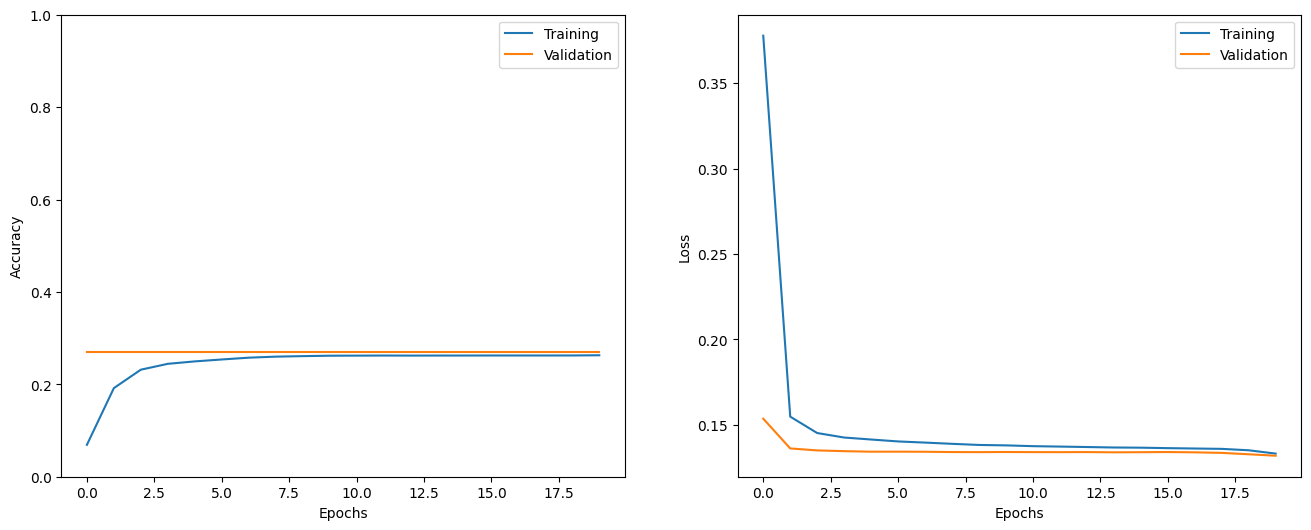

In [ ]:
show_history(history)

In [ ]:
import numpy as np

In [ ]:
classes = set(valid_emotions)

# Creating classes to index and index to classes dictionaries
class2idx = dict((c, idx) for idx, c in enumerate(classes))
idx2class = dict((idx, c) for idx, c in enumerate(classes))

class2idx, idx2class

({'caring': 0,
  'grief': 1,
  'curiosity': 2,
  'embarrassment': 3,
  'excitement': 4,
  'pride': 5,
  'realization': 6,
  'love': 7,
  'remorse': 8,
  'disappointment': 9,
  'nervousness': 10,
  'confusion': 11,
  'optimism': 12,
  'sadness': 13,
  'gratitude': 14,
  'annoyance': 15,
  'anger': 16,
  'amusement': 17,
  'admiration': 18,
  'joy': 19,
  'disgust': 20,
  'disapproval': 21,
  'neutral': 22,
  'approval': 23,
  'relief': 24,
  'desire': 25,
  'fear': 26,
  'surprise': 27},
 {0: 'caring',
  1: 'grief',
  2: 'curiosity',
  3: 'embarrassment',
  4: 'excitement',
  5: 'pride',
  6: 'realization',
  7: 'love',
  8: 'remorse',
  9: 'disappointment',
  10: 'nervousness',
  11: 'confusion',
  12: 'optimism',
  13: 'sadness',
  14: 'gratitude',
  15: 'annoyance',
  16: 'anger',
  17: 'amusement',
  18: 'admiration',
  19: 'joy',
  20: 'disgust',
  21: 'disapproval',
  22: 'neutral',
  23: 'approval',
  24: 'relief',
  25: 'desire',
  26: 'fear',
  27: 'surprise'})

In [ ]:
# Prediction
import random

i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_texts[i])
print('Emotion:', test_labels[i])

p = model.predict(np.expand_dims(test_padded_sequences[i], axis=0))[0]
print('Predicted Emotion:', idx2class.get(np.argmax(p)))

Sentence: she always looks sticky.
Emotion: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 [==============================] - 0s 40ms/step
Predicted Emotion: disgust


In [ ]:
preds = model.predict(test_padded_sequences)
preds.shape

232/232 [==============================] - 16s 67ms/step


(7415, 28)